In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [45]:
# Introdation
"""
This data relates to artistic works,such as films and series, and is taken from a source similar to international film databases. 
This data is distributed into two files that have been merged and cleaned to obtain accurate and integrated information.

It includes details such as the main and original titles, types of works (film, series, or short), time duration in minutes, and year of production.
We can also learn about the artistic classifications of works (such as comedy, drama, and science fiction) and whether they are intended for adults.

It contains the average rating of each artwork based on audience voting.
It displays the number of reviews, which gives us an indication of the popularity of the business.

"""

'\nThis data relates to artistic works,such as films and series, and is taken from a source similar to international film databases. \nThis data is distributed into two files that have been merged and cleaned to obtain accurate and integrated information.\n\nIt includes details such as the main and original titles, types of works (film, series, or short), time duration in minutes, and year of production.\nWe can also learn about the artistic classifications of works (such as comedy, drama, and science fiction) and whether they are intended for adults.\n\nIt contains the average rating of each artwork based on audience voting.\nIt displays the number of reviews, which gives us an indication of the popularity of the business.\n\n'

In [46]:
file1 = 'title.basics.csv'
file2 = 'title.ratings.csv'

basics = pd.read_csv(file1,sep=',')
ratings = pd.read_csv(file2,sep=',')


In [47]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [48]:
basics.shape

(1048575, 9)

In [49]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2108
1,tt0000002,5.6,284
2,tt0000003,6.5,2132
3,tt0000004,5.3,182
4,tt0000005,6.2,2860


In [50]:
ratings.shape

(1510526, 3)

In [51]:
mergedFile = pd.merge(basics, ratings, on='tconst', how='inner')

In [90]:
mergedFile.head(20
               )

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,primaryGenre,runtimeCategory,isSuccessful,runtime_x_rating
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,1.0,"Documentary,Short",5.7,2108,Documentary,Short,0,5.7
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,5.0,"Animation,Short",5.6,284,Animation,Short,0,28.0
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892.0,5.0,"Animation,Comedy,Romance",6.5,2132,Animation,Short,1,32.5
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,12.0,"Animation,Short",5.3,182,Animation,Short,0,63.6
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,1.0,"Comedy,Short",6.2,2860,Comedy,Short,1,6.2
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894.0,1.0,Short,5.0,203,Short,Short,0,5.0
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894.0,1.0,"Short,Sport",5.3,896,Short,Short,0,5.3
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894.0,1.0,"Documentary,Short",5.4,2255,Documentary,Short,0,5.4
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894.0,45.0,Romance,5.4,215,Romance,Medium,0,243.0
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895.0,1.0,"Documentary,Short",6.8,7785,Documentary,Short,1,6.8


In [53]:
emptyValues = mergedFile.isnull().sum()
print(emptyValues)

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
dtype: int64


In [54]:
mergedFile = mergedFile.drop('endYear', axis=1)
mergedFile = mergedFile.drop_duplicates(subset=['tconst'], keep='first')
mergedFile.shape

(473910, 10)

عشان مش ضامن هل كل الداتا اللي موجوده في ال 
startYear , runtimeMinutes ,numVotes
كلها داتا رقميه 
ف احتياطي هحول وخلاص 

In [55]:
mergedFile['startYear'] = pd.to_numeric(mergedFile['startYear'], errors='coerce')
mergedFile['runtimeMinutes'] = pd.to_numeric(mergedFile['runtimeMinutes'], errors='coerce')
mergedFile['numVotes'] = pd.to_numeric(mergedFile['numVotes'], errors='coerce')

In [56]:
emptyValues = mergedFile.isnull().sum()
print(emptyValues)

tconst                0
titleType             0
primaryTitle          0
originalTitle         0
isAdult               0
startYear            25
runtimeMinutes    90639
genres                0
averageRating         0
numVotes              0
dtype: int64


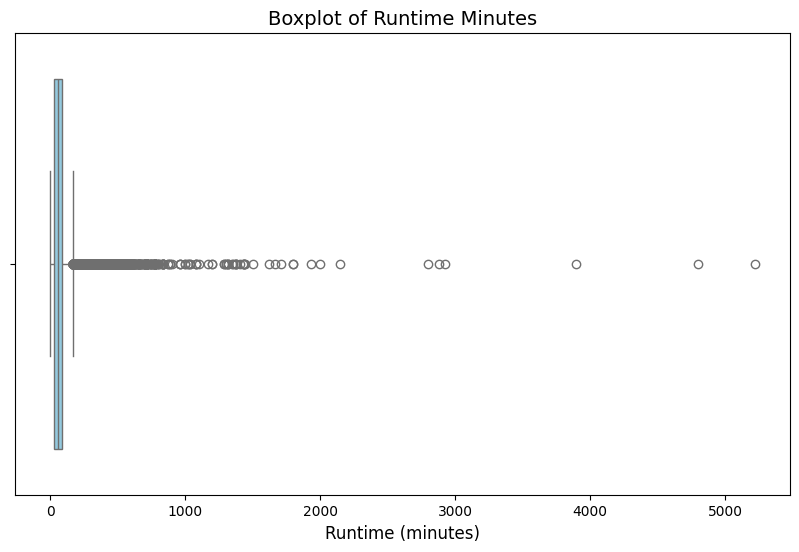

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=mergedFile, x='runtimeMinutes', color='skyblue')

plt.title("Boxplot of Runtime Minutes", fontsize=14)
plt.xlabel("Runtime (minutes)", fontsize=12)

plt.show()

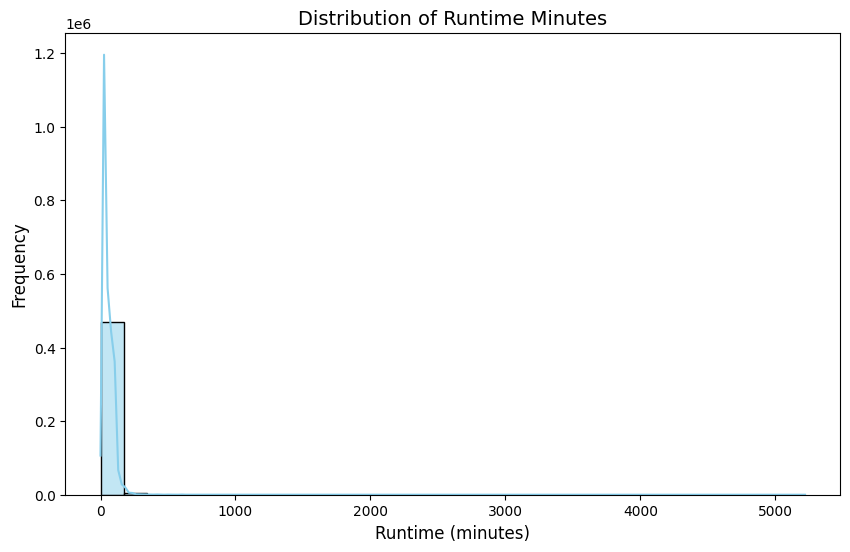

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(data=mergedFile, x='runtimeMinutes', kde=True, color='skyblue', bins=30)
plt.title("Distribution of Runtime Minutes", fontsize=14)
plt.xlabel("Runtime (minutes)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

انا مفهمتش حاجه من ال Box Blot 
فهحسبها يدوي 
مش هينفع احذف القيم الشاذه 
لانها قيم حقيقيه بالفعل 

لما حولت لاقيت فيه فعلا قيم مش رقمه واتحولت لقيم Null 
startYear عدد قليل ارميه احسن 
runtimeMinutes عدد كبير اتعامل معاه 
هحذف القيم ال 

In [58]:
mergedFile = mergedFile.dropna(subset=['startYear'])
modeGenre = mergedFile['genres'].mode()[0]
mergedFile['genres'] = mergedFile['genres'].replace('\\N', modeGenre)
Q1 = mergedFile['runtimeMinutes'].quantile(0.25)
Q3 = mergedFile['runtimeMinutes'].quantile(0.75)
iqr = Q3 - Q1

lowerBound = Q1 - 1.5 * iqr
upperBound = Q3 + 1.5 * iqr


outliers = mergedFile[(mergedFile['runtimeMinutes'] < lowerBound) | (mergedFile['runtimeMinutes'] > upperBound)]

print(outliers.shape[0])
mergedFile['runtimeMinutes'] = mergedFile['runtimeMinutes'].fillna(mergedFile['runtimeMinutes'].median())
emptyValues = mergedFile.isnull().sum()
print(emptyValues)


3574
tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
dtype: int64


In [59]:
mergedFile.describe()

,isAdult,startYear,runtimeMinutes,averageRating,numVotes
count,473885.000000,473885.000000,473885.000000,473885.000000,4.738850e+05
mean,0.030425,1983.949625,62.428146,6.701899,1.635643e+03
std,0.171754,22.589607,42.905119,1.301337,2.537419e+04
min,0.000000,1888.000000,0.000000,1.000000,5.000000e+00
25%,0.000000,1971.000000,30.000000,5.900000,1.700000e+01
50%,0.000000,1991.000000,60.000000,6.900000,4.300000e+01
75%,0.000000,2002.000000,87.000000,7.600000,1.550000e+02
max,1.000000,2024.000000,5220.000000,10.000000,2.974468e+06


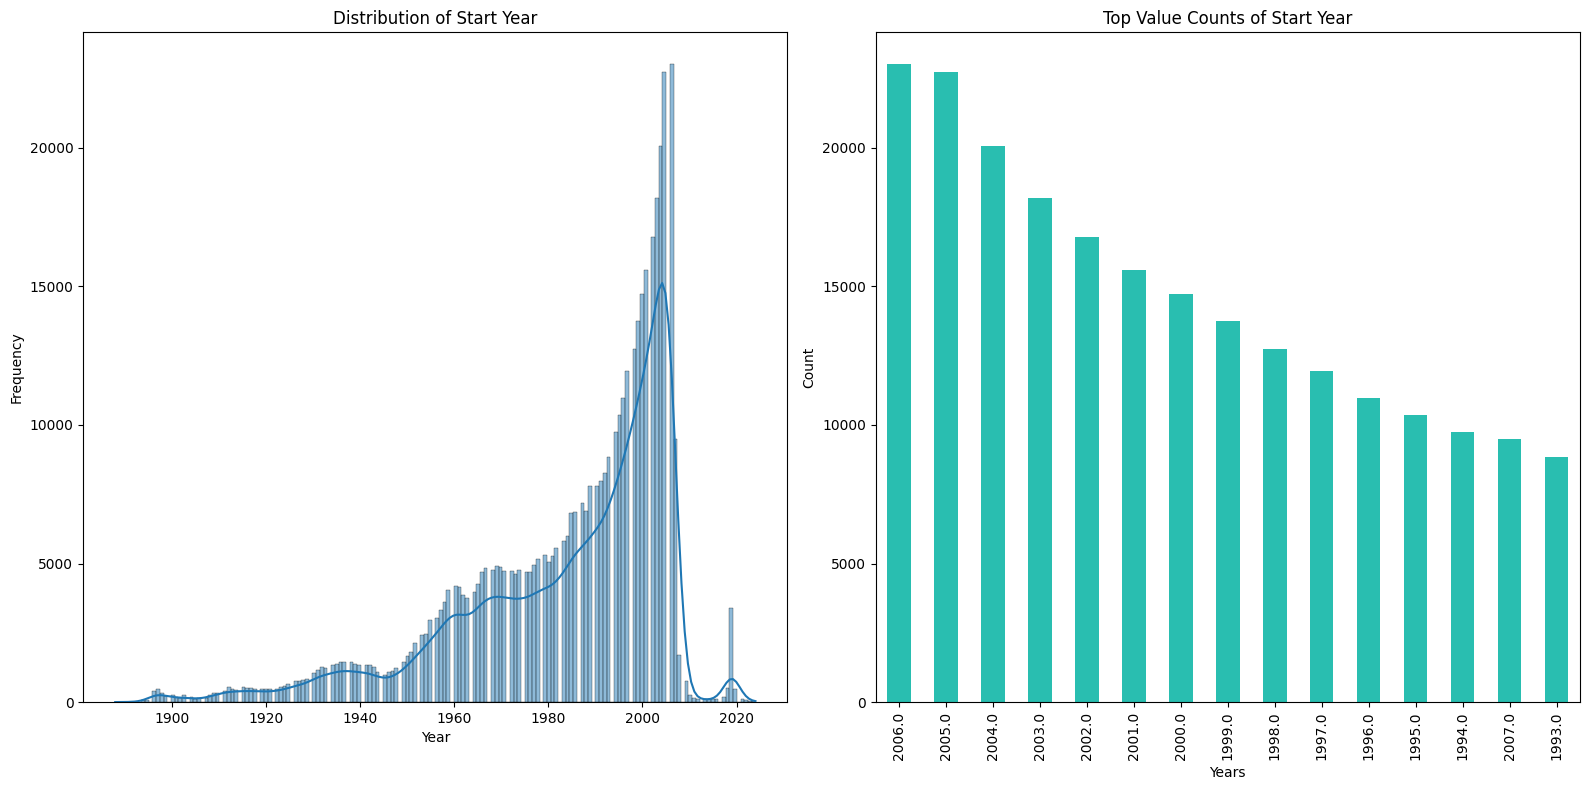

In [60]:
# 1 - distribution of movie releases over the years

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.histplot(mergedFile['startYear'], kde=True, color="#1f77b4")
plt.title("Distribution of Start Year")
plt.xlabel("Year")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
top_categories = mergedFile['startYear'].value_counts().head(15)
top_categories.plot(kind='bar', color="#29beb0")
plt.title("Top Value Counts of Start Year")
plt.xlabel("Years")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


Representation of data

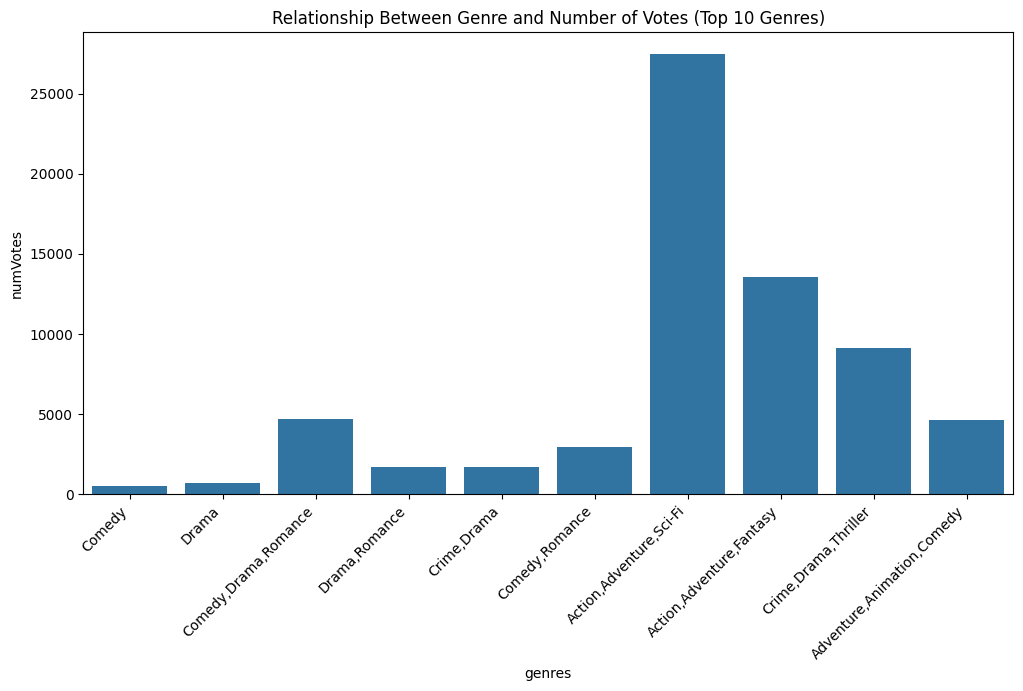

Top 10 Most Frequent Genres:
genres
Comedy                        58406
Drama                         45805
Documentary                   17209
Drama,Romance                 12153
Crime,Drama,Mystery           11650
Crime,Drama                   11499
Short                         10943
Comedy,Drama                  10924
Action,Adventure,Animation    10447
Adult                          9755
Name: count, dtype: int64


In [61]:
top10Genres = mergedFile.groupby('genres')['numVotes'].sum().sort_values(ascending=False).head(10)

filteredData = mergedFile[mergedFile['genres'].isin(top10Genres.index)]

plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='numVotes', data=filteredData, errorbar=None)
plt.xticks(rotation=45, ha="right")
plt.title('Relationship Between Genre and Number of Votes (Top 10 Genres)')
plt.show()
countByGenre = mergedFile['genres'].value_counts().head(10)
print("Top 10 Most Frequent Genres:")
print(countByGenre)

Average Rating Over Years

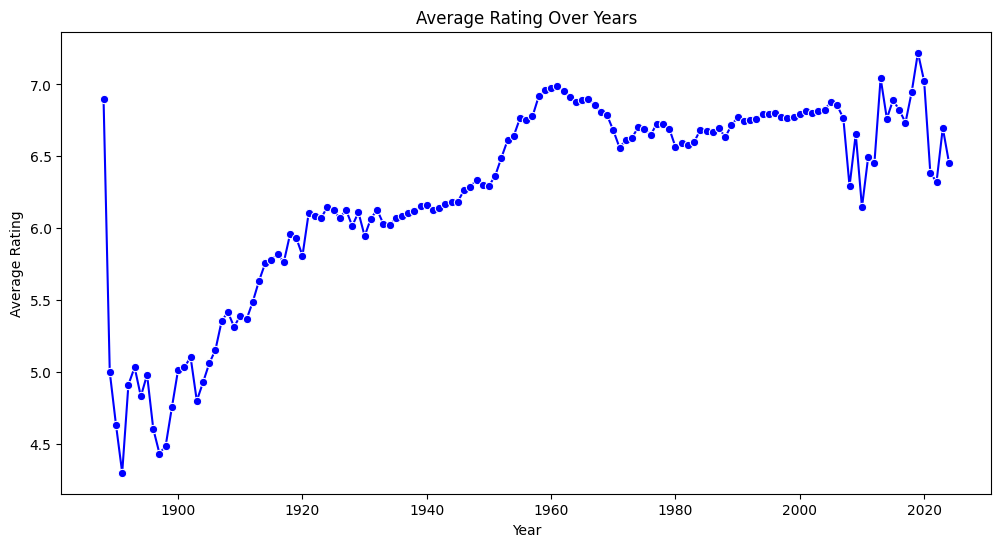

In [62]:
avgRatingPerYear = mergedFile.groupby('startYear')['averageRating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='startYear', y='averageRating', data=avgRatingPerYear, marker='o', color='b')
plt.title('Average Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


 Runtime vs Rating

انا عايز استبدل القيم المفقود ب حاجه 
I have 2 option 
1- mean 
ودا مش هينفع ليه ؟ عشان عندي قيم شاذه 
2- median 
الحل الامثل عشان القيم الشاذه 
بالمناسبه البتاعه دي | معناها or 
بتستخدمها مع الاعمده 

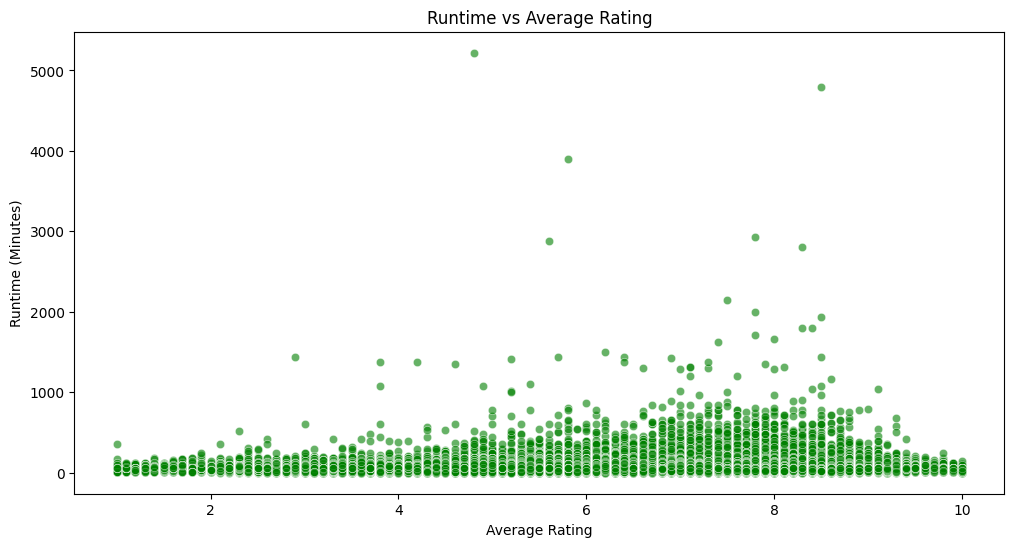

In [89]:
#mergedFileNOut = mergedFile[(mergedFile['runtimeMinutes'] >= lowerBound) & (mergedFile['runtimeMinutes'] <= upperBound)]
plt.figure(figsize=(12, 6))
sns.scatterplot(x='averageRating', y='runtimeMinutes', data=mergedFile, alpha=0.6, color='g')
plt.title('Runtime vs Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Runtime (Minutes)')
plt.show()

Votes vs Rating

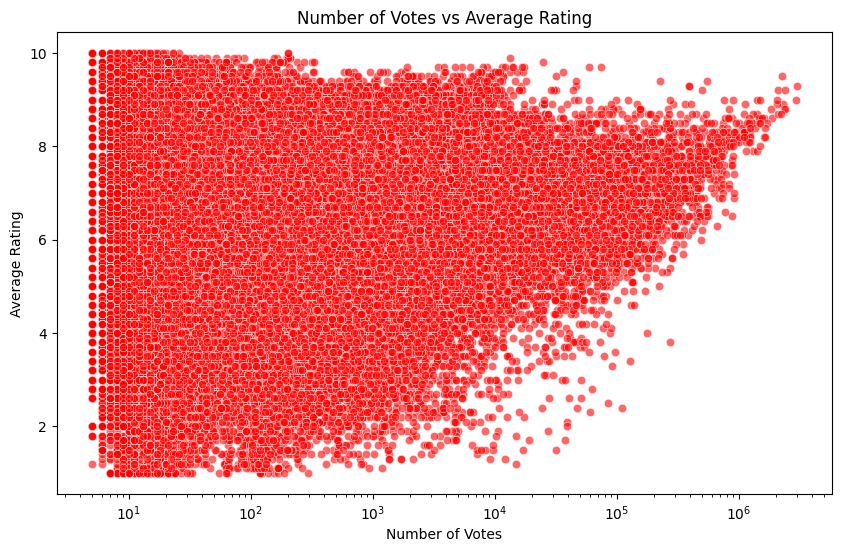

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numVotes', y='averageRating', data=mergedFile, alpha=0.6, color='r')
plt.title('Number of Votes vs Average Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.xscale('log')
plt.show()

Top Rated Genres

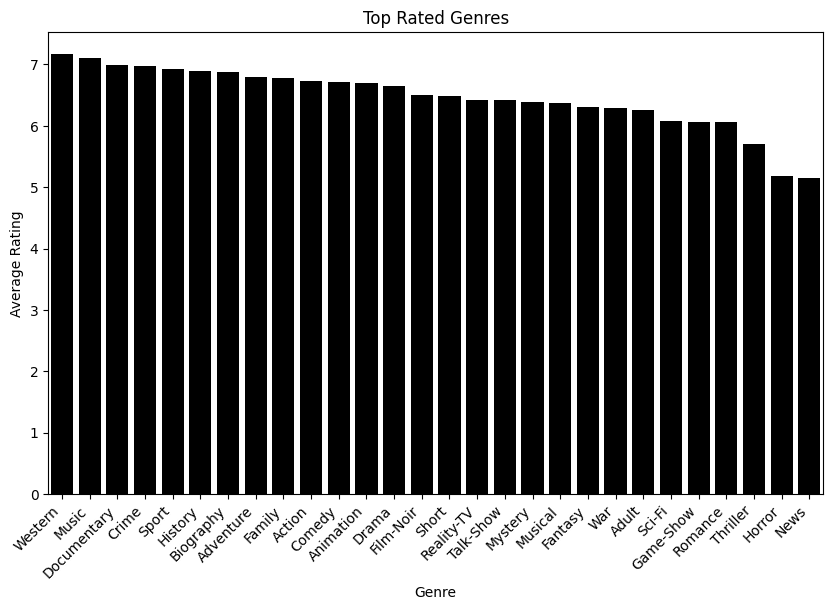

In [65]:
mergedFile['primaryGenre'] = mergedFile['genres'].str.split(',').str[0]
avgRatingPerGenre = mergedFile.groupby('primaryGenre')['averageRating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avgRatingPerGenre.index, y=avgRatingPerGenre.values, color='black')
plt.title('Top Rated Genres') 
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right') 
plt.show()

Conclusions from the data

Add a column to a new classification 
It is according to his time

In [66]:
def classifyRuntime(minutes):
    if minutes <= 15:
        return 'Short'
    elif minutes <= 60:
        return 'Medium'
    else:
        return 'Long'

mergedFile['runtimeCategory'] = mergedFile['runtimeMinutes'].apply(classifyRuntime)
mergedFile.columns


Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes',
       'primaryGenre', 'runtimeCategory'],
      dtype='object')

Do short films get a higher rating than long films?

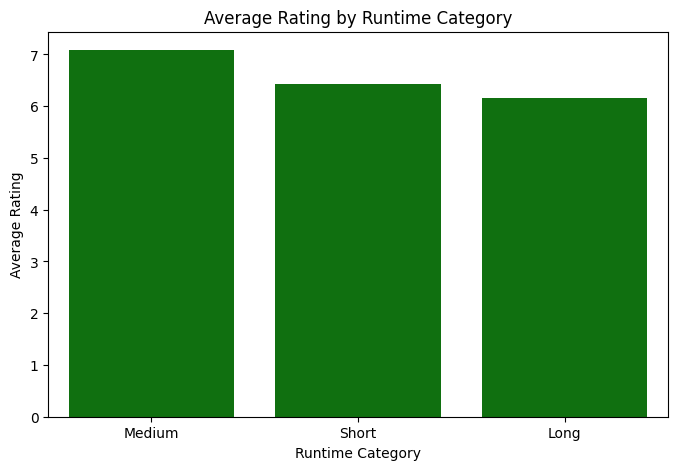

In [67]:
avgRatingByRuntime = mergedFile.groupby('runtimeCategory')['averageRating'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=avgRatingByRuntime.index, y=avgRatingByRuntime.values, color='g')
plt.title('Average Rating by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Average Rating')
plt.show()


success rating column

In [68]:
mergedFile['isSuccessful'] = mergedFile['averageRating'].apply(lambda x: 1 if x >= 6 else 0)
mergedFile.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes',
       'primaryGenre', 'runtimeCategory', 'isSuccessful'],
      dtype='object')

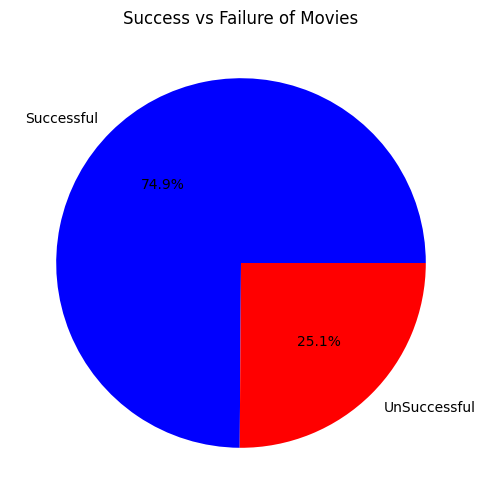

In [69]:
plt.figure(figsize=(6, 6))
plt.pie(
    mergedFile['isSuccessful'].value_counts(),
    labels=['Successful', 'UnSuccessful'],
    autopct='%1.1f%%',
    colors=['blue', 'red']
)
plt.title('Success vs Failure of Movies')
plt.show()

Average Start Year by Runtime Category

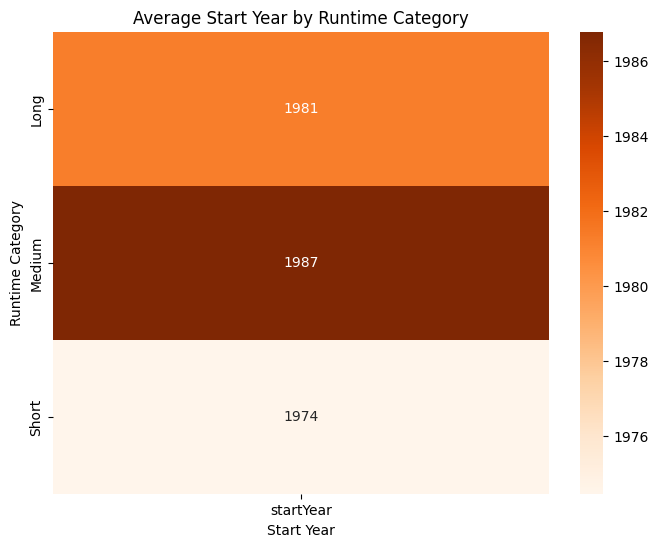

In [91]:
# mergedFileNOut = mergedFile[(mergedFile['runtimeMinutes'] >= lowerBound) & (mergedFile['runtimeMinutes'] <= upperBound)]

runtimeYear = mergedFile.groupby('runtimeCategory')['startYear'].mean().reset_index()
runtimeYearPivot = runtimeYear.pivot_table(index='runtimeCategory', values='startYear')

plt.figure(figsize=(8, 6))
sns.heatmap(runtimeYearPivot, annot=True, fmt='.0f', cmap='Oranges', cbar=True)
plt.title('Average Start Year by Runtime Category')
plt.xlabel('Start Year')
plt.ylabel('Runtime Category')
plt.show()


 Success Rate by Runtime Category

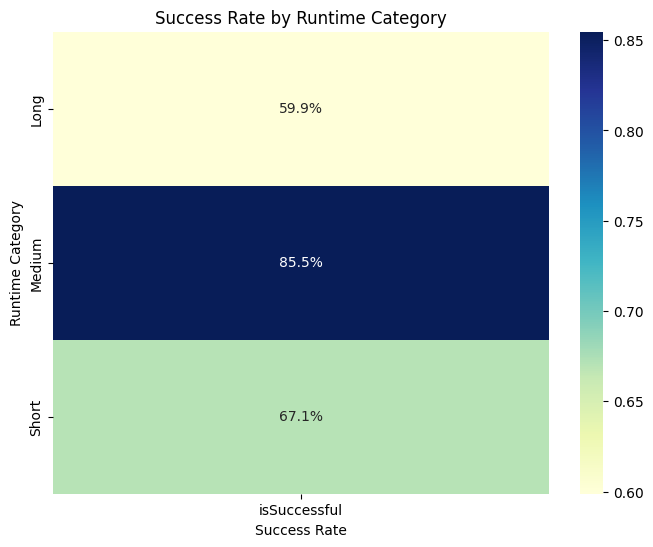

In [71]:
successRate = mergedFile.groupby('runtimeCategory')['isSuccessful'].mean().reset_index()
successRatePivot = successRate.pivot_table(index='runtimeCategory', values='isSuccessful')

plt.figure(figsize=(8, 6))
sns.heatmap(successRatePivot, annot=True, fmt='.1%', cmap='YlGnBu', cbar=True)
plt.title('Success Rate by Runtime Category')
plt.xlabel('Success Rate')
plt.ylabel('Runtime Category')
plt.show()


In [72]:
mergedFileNOut.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes',
       'primaryGenre', 'runtimeCategory', 'isSuccessful'],
      dtype='object')

In [73]:
mergedFileNOut.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,primaryGenre,runtimeCategory,isSuccessful
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,1.0,"Documentary,Short",5.7,2108,Documentary,Short,0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,5.0,"Animation,Short",5.6,284,Animation,Short,0
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892.0,5.0,"Animation,Comedy,Romance",6.5,2132,Animation,Short,1
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,12.0,"Animation,Short",5.3,182,Animation,Short,0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,1.0,"Comedy,Short",6.2,2860,Comedy,Short,1


In [74]:
mergedFileNOut.shape

(470311, 13)

Select features and target

In [75]:
features = ['runtimeMinutes', 'averageRating']  
target = 'numVotes'

Split data into training and test sets

In [76]:
X = mergedFile[features]
y = mergedFile[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Train a simple linear regression model

In [77]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

 Predict on the test set

In [78]:
y_pred = model.predict(X_test)

Evaluate the model

In [79]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")


Root Mean Square Error (RMSE): 24567.856404684833


Display 

In [80]:
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred[:len(y_test)]})
print(comparison.head())


   Actual    Predicted
0      17  2739.535184
1      18  2664.743955
2     630  2440.370267
3      10 -2321.512750
4      12  2056.251452


In [81]:
features = ['runtimeMinutes', 'averageRating']
target = 'numVotes'

mergedFile['runtime_x_rating'] = mergedFile['runtimeMinutes'] * mergedFile['averageRating']
features.append('runtime_x_rating')

X = mergedFile[features]
y = mergedFile[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred[:len(y_test)]})
print(comparison.head(20))

Root Mean Square Error (RMSE): 25998.945032576146
    Actual    Predicted
0       17   146.441026
1       18   133.862771
2      630   132.334563
3       10    56.500350
4       12   341.449061
5      185   365.681441
6       20    47.597373
7       25    50.606414
8       11   299.555876
9       21   150.050672
10     479    72.549580
11     942   250.989211
12     116   203.863328
13       7   135.339082
14     686   198.066663
15       8   102.958334
16      39   660.102241
17      38   351.885958
18     326  1325.658001
19      76  1240.403983


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred[:len(y_test)]})
print(comparison.head())